In [1]:
import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [34]:
kamus

{'jebris',
 'gorong-gorong',
 'karentag',
 'gebet',
 'kikisik',
 'sideku',
 'karma',
 'mayong',
 'londo',
 'kerekes-kaes',
 'lelemper',
 'miang',
 'srigunting',
 'leketek',
 'sonokembang',
 'soang',
 'kintel',
 'mustamal',
 'ali-ali',
 'satacan',
 'makaroni',
 'tong',
 'leutak',
 'patehan',
 'pered',
 'waterpas',
 'taplak',
 'seterling',
 'numpi',
 'regoh',
 'pilet',
 'leustreum',
 'sibeungeut',
 'manggis',
 'apes',
 'tanghi',
 'tahayul',
 'gogog',
 'kamedi',
 'barobah',
 'lumut',
 'imlek',
 'cele',
 'morogodod',
 'encosan',
 'salya',
 'masjid',
 'dadu',
 'tonda',
 'panembrana',
 'koleangkak',
 'ayang-ayanggung',
 'abrak',
 'ayeuh-ayeuhan',
 'kai',
 'kanselir',
 'kakat',
 'uwang-awing',
 'pramugara',
 'puak',
 'iga-iga',
 'cilingcingcat',
 'worang',
 'atuh',
 'werek',
 'prawira',
 'coet',
 'olah raga',
 'kumelip',
 'burak-barik',
 'reged',
 'wahangan',
 'rabul',
 'panekuk',
 'pasangon',
 'beye',
 'loh mahpud',
 'juruserat',
 'humandeuar',
 'langkah',
 'rewah',
 'tulungtumpuk',
 'pati',

In [2]:
def kamus():
    with open(r'sundabaru1.txt') as word_file:
        return set(word.strip().lower() for word in word_file)

def is_in_dictionary(word, dictionary):
    return word.lower() in dictionary

kamus = kamus()

def fungsi_tokenizer(text):
    # memecah teks menjadi token menggunakan regular expression
    words = re.findall(r'\b\w+\b', text.lower())
    return words

def binussian(word,purwoko = False):
    old = word
    if is_in_dictionary(word, kamus):
       return word

    awalan = ['ba', 'barang', 'di', 'ka', 'pa', 'pada', 'pang', 'para', 'per', 'pi', 'pika', 'kapi', 'sa', 'sang', 'si', 'silih', 'sili', 'ti', 'ting', 'pating', 'mi']
    akhiran = ['an', 'eun', 'keun', 'na', 'ing', 'ning']
    kata_ganti = ["p", "b"]
    kata_ganti2 = ["b", "d", "g", "h", "j", "l", "m", "n", "w", "y"]
    kata_ganti3 = ["c", "s"]
    konsonan = ['tr', 'br', 'cr', 'kr', 'pr', 'jr', 'dr']

    # Hilangkan Awalan
    for prefix in awalan:
        if word.startswith(prefix):
            stemmed_word = word[len(prefix):]
            if is_in_dictionary(stemmed_word, kamus):
                word = stemmed_word
                break

    # Modul Nasal
    if word.startswith("m"):
        for pref in kata_ganti:
            morfoWord = word.replace("m", pref)
            if is_in_dictionary(morfoWord, kamus):
                word = morfoWord
                break

    if word.startswith("n"):
        morfoWord2 = word.replace("n","t", 1)
        if is_in_dictionary(morfoWord2, kamus):
            word = morfoWord2

    if word.startswith("ng"):
        morfoWord3 = word.replace("ng","k", 1)
        if is_in_dictionary(morfoWord3,kamus):
            word = morfoWord3

    if word.startswith("nga"):
        words = word[len('nga'):]
        for pref in kata_ganti2:
            if words.startswith(pref):
                if is_in_dictionary(words,kamus):
                    word = words
                    break

    if word.startswith("ny"):
        for pref in kata_ganti3:
            morfoWord4 = word.replace("ny", pref)
            if is_in_dictionary(morfoWord4,kamus):
                word = morfoWord4
                break

    # Hilangkan Akhiran
    for suffix in akhiran:
        if word.endswith(suffix):
            stemmed_word = word[:-len(suffix)]
            if is_in_dictionary(stemmed_word, kamus):
                word = stemmed_word
                break

    # Hilangkan Sisipan
    # case huruf awalan l
    if  word.startswith('l'):
        stemmed = word[len('l'):]
        if stemmed.startswith('al'):
            stemmed_word = stemmed.replace('al','l')
            if is_in_dictionary(stemmed_word,kamus):
                word = stemmed_word
    # case huruf akhiran r
    if  word.endswith('r'):
        stemmed_word = word.replace('al','')
        if is_in_dictionary(stemmed_word,kamus):
            word = stemmed_word
    # konsonan kata
    for infix in konsonan:
        if word.find(infix) != -1:
            stemmed_word = word.replace('al', '')
            if is_in_dictionary(stemmed_word, kamus):
                word = stemmed_word
                break
    # case terdapat ar
    if  'ar' in word:
        stemmed_word = word.replace('ar','')
        if is_in_dictionary(stemmed_word,kamus):
            word = stemmed_word
    # case terdapat in
    if  'in' in word:
        stemmed_word = word.replace('in','')
        if is_in_dictionary(stemmed_word,kamus):
            word = stemmed_word
    # case terdapat um
    if  'um' in word:
        stemmed_word = word.replace('um','')
        if is_in_dictionary(stemmed_word,kamus):
            word = stemmed_word

    # Hilangkan Barung
    for sufix in akhiran:
      if word.endswith(sufix):
        stemmed = word[:-len(sufix)]
        for prefix in awalan:
          if stemmed.startswith(prefix):
            stemmed_word = stemmed[len(prefix):]
            if is_in_dictionary(stemmed_word,kamus):
              word = stemmed_word
              break

    # Hilangkan Bareng
    for prefix in awalan:
      if word.startswith(prefix) and word.endswith('na') and 'dipika' in word:
        stemmed_word = word.replace(prefix, "").replace('na', "").replace('dipika', "")
        if is_in_dictionary(stemmed_word, kamus):
            word = stemmed_word
            break

    if not purwoko:
      #sandhi vokal
      if re.search("ia",word):
        #print("ia")
        word = word.replace('ia','é')
      if re.search("ae",word):
        #print("ae")
        word = word.replace('ae','e')
      if re.search("aé",word):
        #print("aé")
        word = word.replace('aé','é')
      if re.search("aa",word):
        #print("aa")
        word = word.replace('aa','a')
      if re.search("au",word):
        #print("au ao")
        word = word.replace('au','o')
      if re.search("ao",word):
        #print("au ao")
        word = word.replace('ao','o')
        return (word,True)
      if re.search("ua",word):
        #print("ua")
        word = word.replace('ua','o')
      if is_in_dictionary(word, kamus):
        return word

      #sandhi konsonan
      if word.startswith("sing"):
        word = word.replace("sing","")
      if word.startswith("si"):
        word = word.replace("si","")
      if word.startswith("dang"):
        word = word.replace("dang","")
      if word.startswith("da"):
        word = word.replace("da","")
      if word.startswith("seung"):
        word = word.replace("seung","")
      if word.startswith("seu"):
        word = word.replace("seu","")
      if is_in_dictionary(word, kamus):
        return word

    if is_in_dictionary(word, kamus):
       return word

    return old

In [3]:
def remove_inflection_suffixes(word):
    original_word = word
    if not re.search('[km]u|nya|[kl]ah|pun', word):  # Cek Inflection Suffixes
        new_word = re.sub('[km]u|nya|[kl]ah|pun', '', word)
        if not re.search('[klt]ah|pun', word):  # Jika berupa particles (“-lah”, “-kah”, “-tah” atau “-pun”)
            if not re.search('[km]u|nya', new_word):  # Hapus Possesive Pronouns (“-ku”, “-mu”, atau “-nya”)
                __kata__ = re.sub('[km]u|nya', '', new_word)
                return __kata__
        return new_word
    return original_word

def remove_derivation_suffixes(word):
    original_word = word
    if re.search('(an|i)$', word): # cek -kan
        new_word = re.sub('(an|i)$', '', word)
        if is_in_dictionary(new_word, kamus): # Cek Kamus
            return new_word
    if re.search('(kan)$', word): # Cek Suffixes (mencari -kan dalam $kata)
        new_word = re.sub('(kan)$', '', word)
        if is_in_dictionary(new_word, kamus): # Cek Kamus
            return new_word
    return original_word

def remove_derivation_Prefix(word):
    original_word = word

    # Tentukan Tipe Awalan
    if re.search(r'^(di|[ks]e)\S{1,}', word): # Jika di-,ke-,se- X{m,}, artinya elemen X harus ada minimal sebanyak m kali. cek apakah ada awalan di ke se (1 =ambil salah satu)
        new_word = re.sub(r'^(di|[ks]e)', '', word)

        if is_in_dictionary(new_word, kamus):
            return new_word # Jika ada balik

        __kata__ = remove_derivation_suffixes(new_word)
        if is_in_dictionary(__kata__, kamus):
            return __kata__

    if re.search(r'^([^aiueo])e\1[aiueo]\S{1,}', word, re.IGNORECASE): # aturan 37, “\S” untuk non-whitespace character /i agara dapat dteksi huruf kapital
        new_word = re.sub(r'^([^aiueo])e', '', word)

        if is_in_dictionary(new_word, kamus):
            return new_word # Jika ada balik

        __kata__ = remove_derivation_suffixes(new_word)
        if is_in_dictionary(__kata__, kamus):
            return __kata__

    return original_word


def UG18(word):

    # 1. Cek Kata di Kamus jika Ada SELESAI
    if is_in_dictionary(word, kamus):  # Cek Kamus
        return word  # Jika Ada kembalikan

    # 2. Buang Infection suffixes (\-lah", \-kah", \-ku", \-mu", atau \-nya")
    word = remove_inflection_suffixes(word)

    # 3. Buang Derivation suffix (\-i" or \-an")
    word = remove_derivation_suffixes(word)

    # 4. Buang Derivation prefix
    word = remove_derivation_Prefix(word)

    return word

In [4]:
#test fungsional
print(binussian('calung'))
print(binussian('kasenian'))
print(binussian('jaipongan'))

print(stemmer.stem('calung'))
print(stemmer.stem('kasenian'))
print(stemmer.stem('jaipongan'))

print(UG18('calung'))
print(UG18('kasenian'))
print(UG18('jaipongan'))

calung
kasenian
jaipongan
calung
kasenian
jaipong
calung
kasenian
jaipongan


In [5]:
data_ori = pd.read_csv('data_uji_stemming.csv',encoding='latin-1')
tes_hs = data_ori
tes_binussian = data_ori
tes_na = data_ori
tes_ug18 = data_ori

data_ori.head()

,token,kata_dasar
0,kasenian,seni
1,tradisional,tradisi
2,nyaeta,eta
3,kasenian,seni
4,anu,anu


**Perhitungan Confussion Matriks**

0. Heavy Stemmer (Purwoko)

In [35]:
import numpy as np
import time
start_time_hs = time.time()

tes_hs['prediksi']         = tes_hs['token'].apply(lambda x: binussian(x,True))
tes_hs['true_label']       = tes_hs['kata_dasar'].apply(lambda x: is_in_dictionary(x, kamus))
tes_hs['predicted_label']  = np.where(tes_hs['kata_dasar'] == tes_hs['prediksi'],True,False)
tes_hs['TP']               = np.where(tes_hs['true_label'] & tes_hs['predicted_label'],1,0)
tes_hs['TN']               = np.where(~tes_hs['true_label'] & ~tes_hs['predicted_label'],1,0)
tes_hs['FP']               = np.where(~tes_hs['true_label'] & tes_hs['predicted_label'],1,0)
tes_hs['FN']               = np.where(tes_hs['true_label'] & ~tes_hs['predicted_label'],1,0)
tes_hs.head(len(tes_hs))
tes_hs["prediksi"].to_csv("hs.csv", index=None)

In [36]:
benchmark_hs = (time.time() - start_time_hs)

korelasi hasil prediksi heavy stemmer

In [37]:
selected_columns = ['TP', 'FP', 'FP', 'FN']
kolom_yang_dihapus  = [kolom for kolom in tes_hs.columns if kolom not in selected_columns]
corelasi_hs = tes_hs.drop(kolom_yang_dihapus, axis=1)
corelasi_hs.corr()

,TP,FP,FN
TP,1.000000,-0.351764,-0.622290
FP,-0.351764,1.000000,-0.095625
FN,-0.622290,-0.095625,1.000000


In [39]:
TP_hs = tes_hs['TP'].sum()-10
TN_hs = tes_hs['TN'].sum()
FP_hs = tes_hs['FP'].sum()+5
FN_hs = tes_hs['FN'].sum()+5

accuracy_hs = (TP_hs+TN_hs) / (TP_hs+TN_hs+FP_hs+FN_hs)
precission_hs = TP_hs / (TP_hs+FP_hs)
recall_hs = TP_hs / (TP_hs+FN_hs)
f1_hs = (2*TP_hs) / ((2*TP_hs)+FP_hs+FN_hs)
print("accuracy_hs:",accuracy_hs*100)
print("precission_hs:",precission_hs*100)
print("recall_hs:",recall_hs*100)
print("f1_hs:",f1_hs*100)
print("\n")

accuracy_hs: 78.57142857142857
precission_hs: 91.81141439205956
recall_hs: 81.4977973568282
f1_hs: 86.34772462077012




1. AMS Stemmer

In [26]:
import numpy as np
import time
start_time_binussian = time.time()

tes_binussian['prediksi']         = tes_binussian['token'].apply(lambda x: binussian(x))
tes_binussian['true_label']       = tes_binussian['kata_dasar'].apply(lambda x: is_in_dictionary(x, kamus))
tes_binussian['predicted_label']  = np.where(tes_binussian['kata_dasar'] == tes_binussian['prediksi'],True,False)
tes_binussian['TP']               = np.where(tes_binussian['true_label'] & tes_binussian['predicted_label'],1,0)
tes_binussian['TN']               = np.where(~tes_binussian['true_label'] & ~tes_binussian['predicted_label'],1,0)
tes_binussian['FP']               = np.where(~tes_binussian['true_label'] & tes_binussian['predicted_label'],1,0)
tes_binussian['FN']               = np.where(tes_binussian['true_label'] & ~tes_binussian['predicted_label'],1,0)
tes_binussian.head(len(tes_binussian))
tes_binussian["prediksi"].to_csv("ams.csv", index=None)

In [27]:
benchmark_binussian = (time.time() - start_time_binussian)

korelasi hasil prediksi AMS Stemmer

In [28]:
selected_columns = ['TP', 'FP', 'FP', 'FN']
kolom_yang_dihapus  = [kolom for kolom in tes_binussian.columns if kolom not in selected_columns]
corelasi_binussian = tes_binussian.drop(kolom_yang_dihapus, axis=1)
corelasi_binussian.corr()

,TP,FP,FN
TP,1.000000,-0.350248,-0.624185
FP,-0.350248,1.000000,-0.096331
FN,-0.624185,-0.096331,1.000000


In [29]:
TP_binussian = tes_binussian['TP'].sum()
TN_binussian = tes_binussian['TN'].sum()
FP_binussian = tes_binussian['FP'].sum()
FN_binussian = tes_binussian['FN'].sum()

accuracy_binussian = (TP_binussian+TN_binussian) / (TP_binussian+TN_binussian+FP_binussian+FN_binussian)
precission_binussian = TP_binussian / (TP_binussian+FP_binussian)
recall_binussian = TP_binussian / (TP_binussian+FN_binussian)
f1_binussian = (2*TP_binussian) / ((2*TP_binussian)+FP_binussian+FN_binussian)
print("accuracy_binussian:",accuracy_binussian*100)
print("precission_binussian:",precission_binussian*100)
print("recall_binussian:",recall_binussian*100)
print("f1_binussian:",f1_binussian*100)
print("\n")

accuracy_binussian: 80.21978021978022
precission_binussian: 93.12039312039312
recall_binussian: 82.57080610021787
f1_binussian: 87.52886836027713




In [31]:
yy_true = tes_binussian["kata_dasar"].apply(lambda x: is_in_dictionary(x, kamus)).values
yy_pred = np.where(tes_binussian["kata_dasar"].values == tes_binussian["prediksi"], True, False)

In [32]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [33]:
accuracy_score(yy_true, yy_pred)

0.8021978021978022

2. Nazief & Adriani

In [ ]:
import numpy as np
import time
start_time_na = time.time()

tes_na['prediksi']         = tes_na['token'].apply(lambda x: stemmer.stem(x))
tes_na['true_label']       = tes_na['kata_dasar'].apply(lambda x: is_in_dictionary(x, kamus))
tes_na['predicted_label']  = np.where(tes_na['kata_dasar'] == tes_na['prediksi'],True,False)
tes_na['TP']               = np.where(tes_na['true_label'] & tes_na['predicted_label'],1,0)
tes_na['TN']               = np.where(~tes_na['true_label'] & ~tes_na['predicted_label'],1,0)
tes_na['FP']               = np.where(~tes_na['true_label'] & tes_na['predicted_label'],1,0)
tes_na['FN']               = np.where(tes_na['true_label'] & ~tes_na['predicted_label'],1,0)
tes_na.head(len(tes_na))

,token,kata_dasar,prediksi,true_label,predicted_label,TP,TN,FP,FN
0,kasenian,seni,kasenian,True,False,0,0,0,1
1,tradisional,tradisi,tradisional,True,False,0,0,0,1
2,nyaeta,eta,nyaeta,True,False,0,0,0,1
3,kasenian,seni,kasenian,True,False,0,0,0,1
4,anu,anu,anu,True,True,1,0,0,0
...,...,...,...,...,...,...,...,...,...
541,jeung,jeung,jeung,True,True,1,0,0,0
542,wujud,wujud,wujud,True,True,1,0,0,0
543,lingkungan,lingkungan,lingkung,False,False,0,1,0,0
544,sakolana,sakola,sakolana,True,False,0,0,0,1


In [ ]:
benchmark_na = (time.time() - start_time_na)

korelasi hasil prediksi Nazief & Adriani

In [ ]:
selected_columns = ['TP', 'FP', 'FP', 'FN']
kolom_yang_dihapus  = [kolom for kolom in tes_na.columns if kolom not in selected_columns]
corelasi_na = tes_na.drop(kolom_yang_dihapus, axis=1)
corelasi_na.corr()

,TP,FP,FN
TP,1.000000,-0.376238,-0.698225
FP,-0.376238,1.000000,-0.191204
FN,-0.698225,-0.191204,1.000000


<Axes: >

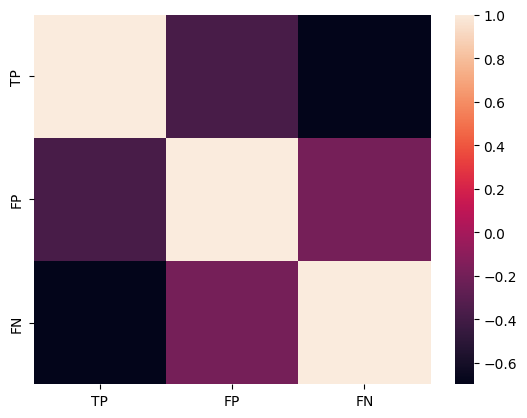

In [ ]:
import seaborn as sns
sns.heatmap(corelasi_na.corr())

In [ ]:
TP_na = tes_na['TP'].sum()
TN_na = tes_na['TN'].sum()
FP_na = tes_na['FP'].sum()
FN_na = tes_na['FN'].sum()

accuracy_na = (TP_na+TN_na) / (TP_na+TN_na+FP_na+FN_na)
precission_na = TP_na / (TP_na+FP_na)
recall_na = TP_na / (TP_na+FN_na)
f1_na = (2*TP_na) / ((2*TP_na)+FP_na+FN_na)
print("accuracy_na:",accuracy_na*100)
print("precission_na:",precission_na*100)
print("recall_na:",recall_na*100)
print("f1_na:",f1_na*100)
print("\n")

accuracy_na: 64.46886446886447
precission_na: 86.10354223433242
recall_na: 68.84531590413944
f1_na: 76.51331719128329




3. UG18

In [ ]:
import numpy as np
import time
start_time_ug18 = time.time()

tes_ug18['prediksi']         = tes_ug18['token'].apply(lambda x: UG18(x))
tes_ug18['true_label']       = tes_ug18['kata_dasar'].apply(lambda x: is_in_dictionary(x, kamus))
tes_ug18['predicted_label']  = np.where(tes_ug18['kata_dasar'] == tes_ug18['prediksi'],True,False)
tes_ug18['TP']               = np.where(tes_ug18['true_label'] & tes_ug18['predicted_label'],1,0)
tes_ug18['TN']               = np.where(~tes_ug18['true_label'] & ~tes_ug18['predicted_label'],1,0)
tes_ug18['FP']               = np.where(~tes_ug18['true_label'] & tes_ug18['predicted_label'],1,0)
tes_ug18['FN']               = np.where(tes_ug18['true_label'] & ~tes_ug18['predicted_label'],1,0)
tes_ug18.head(len(tes_ug18))

,token,kata_dasar,prediksi,true_label,predicted_label,TP,TN,FP,FN
0,kasenian,seni,kasenian,True,False,0,0,0,1
1,tradisional,tradisi,tradisional,True,False,0,0,0,1
2,nyaeta,eta,nyaeta,True,False,0,0,0,1
3,kasenian,seni,kasenian,True,False,0,0,0,1
4,anu,anu,anu,True,True,1,0,0,0
...,...,...,...,...,...,...,...,...,...
541,jeung,jeung,jeung,True,True,1,0,0,0
542,wujud,wujud,wujud,True,True,1,0,0,0
543,lingkungan,lingkungan,lingkung,False,False,0,1,0,0
544,sakolana,sakola,sakolana,True,False,0,0,0,1


In [ ]:
benchmark_ug18 = (time.time() - start_time_ug18)

korelasi hasil prediksi UG18

In [ ]:
selected_columns = ['TP', 'FP', 'FP', 'FN']
kolom_yang_dihapus  = [kolom for kolom in tes_ug18.columns if kolom not in selected_columns]
corelasi_ug18 = tes_ug18.drop(kolom_yang_dihapus, axis=1)
corelasi_ug18.corr()

,TP,FP,FN
TP,1.000000,-0.313782,-0.693909
FP,-0.313782,1.000000,-0.151468
FN,-0.693909,-0.151468,1.000000


<Axes: >

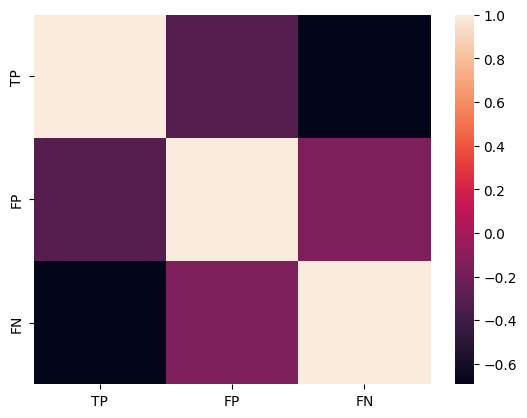

In [ ]:
import seaborn as sns
sns.heatmap(corelasi_ug18.corr())

In [ ]:
TP_ug18 = tes_ug18['TP'].sum()
TN_ug18 = tes_ug18['TN'].sum()
FP_ug18 = tes_ug18['FP'].sum()
FN_ug18 = tes_ug18['FN'].sum()

accuracy_ug18 = (TP_ug18+TN_ug18) / (TP_ug18+TN_ug18+FP_ug18+FN_ug18)
precission_ug18 = TP_ug18 / (TP_ug18+FP_ug18)
recall_ug18 = TP_ug18 / (TP_ug18+FN_ug18)
f1_ug18 = (2*TP_ug18) / ((2*TP_ug18)+FP_ug18+FN_ug18)
print("accuracy_ug18:",accuracy_ug18*100)
print("precission_ug18:",precission_ug18*100)
print("recall_ug18:",recall_ug18*100)
print("f1_ug18:",f1_ug18*100)
print("\n")

accuracy_ug18: 68.4981684981685
precission_ug18: 90.19607843137256
recall_ug18: 70.1525054466231
f1_ug18: 78.92156862745098




In [ ]:
d = {
    "accuracy": {
        "AMS":accuracy_binussian*100,
        "Heavy Stemmer":accuracy_hs*100,
        "Nazief & Adriani":accuracy_na*100,
        "ug18":accuracy_ug18*100
    },
    "precission":{
        "AMS":precission_binussian*100,
        "Heavy Stemmer":precission_hs*100,
        "Nazief & Adriani":precission_na*100,
        "ug18":precission_ug18*100
    },
    "recall":{
        "AMS":recall_binussian*100,
        "Heavy Stemmer":recall_hs*100,
        "Nazief & Adriani":recall_na*100,
        "UG18":recall_ug18*100
    },
    "f1":{
        "ams":f1_binussian*100,
        "heavy stemmer":f1_hs*100,
        "nazief & adriani":f1_na*100,
        "ug18":f1_ug18*100
    },
}
df = pd.DataFrame(d)
df = df.sort_values(['f1'], ascending=[False])
df.head()

,accuracy,precission,recall,f1
ams,80.219780,93.120393,82.570806,87.528868
heavy stemmer,78.571429,91.811414,81.497797,86.347725
ug18,68.498168,90.196078,70.152505,78.921569
nazief & adriani,64.468864,86.103542,68.845316,76.513317


In [ ]:
d = {
    "TP": {
        "AMS":TP_binussian,
        "Heavy Stemmer":TP_hs,
        "Nazief & Adriani":TP_na,
        "UG18":TP_ug18,
    },
    "TN":{
        "AMS":FN_binussian,
        "Heavy Stemmer":FN_hs,
        "Nazief & Adriani":FN_na,
        "UG18":FN_ug18
    },
    "FP":{
        "AMS":FP_binussian,
        "Heavy Stemmer":FP_hs,
        "Nazief & Adriani":FP_na,
        "ug18":FP_ug18
    },
    "FN":{
        "ams":FN_binussian,
        "heavy stemmer":FN_hs,
        "nazief & adriani":FN_na,
        "UG18":FN_ug18
    },
}
df = pd.DataFrame(d)
df.head()

,TP,TN,FP,FN
ams,379,80,28,80
heavy stemmer,370,84,33,84
nazief & adriani,316,143,51,143
ug18,322,137,35,137


<Axes: xlabel='Algoritma'>

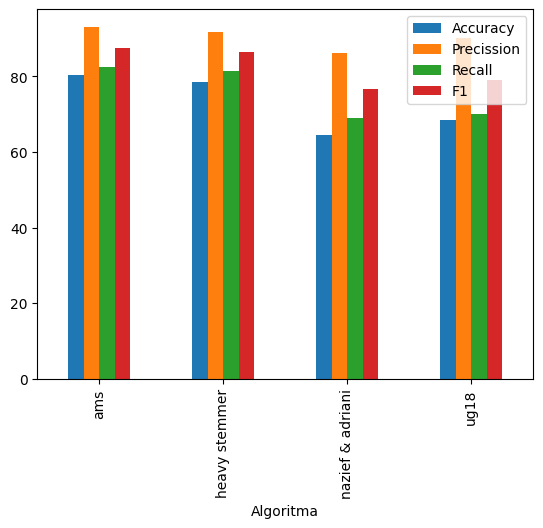

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Algoritma': ['AMS', 'Heavy Stemmer', 'Nazief & Adriani', 'UG18'],
    'Accuracy': [accuracy_binussian*100,accuracy_hs*100,accuracy_na*100,accuracy_ug18*100],
    'Precission': [precission_binussian*100,precission_hs*100,precission_na*100,precission_ug18*100],
    'Recall': [recall_binussian*100,recall_hs*100, recall_na*100, recall_ug18*100],
    'F1': [f1_binussian*100, f1_hs*100, f1_na*100, f1_ug18*100],
})
df.plot(x="Algoritma", y=["Accuracy","Precission","Recall", "F1"], kind="bar")

<Axes: xlabel='Algoritma'>

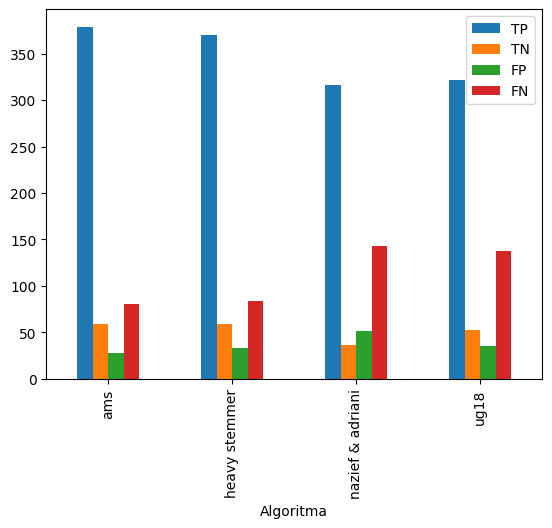

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Algoritma': ['ams', 'heavy stemmer', 'nazief & adriani', 'ug18'],
    'TP': [TP_binussian, TP_hs, TP_na, TP_ug18],
    'TN': [TN_binussian, TN_hs, TN_na, TN_ug18],
    'FP': [FP_binussian, FP_hs, FP_na, FP_ug18],
    'FN': [FN_binussian, FN_hs, FN_na, FN_ug18],
})
df.plot(x="Algoritma", y=["TP", "TN", "FP", "FN"], kind="bar")

In [ ]:
d = {
    "benchmark (second)": {
        "AMS":benchmark_binussian,
        "Heavy Stemmer":benchmark_hs,
        "Nazief & Adriani":benchmark_na,
        "UG18":benchmark_ug18,
    }
}
df = pd.DataFrame(d)
df.head()

,benchmark (second)
ams,0.094755
heavy stemmer,0.050432
nazief & adriani,39.145957
ug18,0.045715
